In [10]:
#import libraries
import numpy as np
import pandas as pd
#libraries yg berhubungan dg text preprocessing
import re
import nltk
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory     
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
#import data
data=pd.read_csv("data_tweet.csv")
text=data['text']

In [24]:
text

0       banyak diskon non, yuk merapat @gopayindonesia...
1       @gojekindonesia Keterlaluan dan kuno banget in...
2       @gopayindonesia saya sudah DM tolong dibantu d...
3       @gopayindonesia tolong ya min, dana saya sudah...
4       @gopayindonesia maximum TopUp saldo gopay bera...
                              ...                        
1177    @ismissyouu @gojekindonesia @gopayindonesia @a...
1178    @gojekindonesia\r\n@gopayindonesia\r\n tiket 0...
1179    @samuelchrstns @gojekindonesia @gopayindonesia...
1180    @nainanina wes tak mention seko 7 jam lalu, te...
1181    @gopayindonesia @akhlishdiaz @gojekindonesia I...
Name: text, Length: 1182, dtype: object

In [25]:
#menghapus link
data_link = []
for line in text:
    result = re.sub(r"http\S+", " ", line)
    data_link.append(result)


In [26]:
#menghapus Retweet
data_rt = []
for lin in data_link:
    result = re.sub(r"RT", " ", line)
    data_rt.append(result)

In [17]:
#menghapus Username
data_uname = []
for line in data_rt:
    result = re.sub(r"RT", " ", line)
    data_uname.append(result)

In [19]:
#menghapus Baris Baru
data_line=[]
for line in data_uname:
    result=re.sub("\n", " ", line)
    data_line.append(result)

In [21]:
#menghapus Angka
data_num = []
for line in data_line:
    result = re.sub("\d", " ", line)
    data_num.append(result)

In [49]:
#menghapus Hashtag
data_hashtag = []
for line in data_num:
    result = re.sub(r"#\S+", " ", line)
    data_hashtag.append(result)          

In [50]:
#menghapus Emoticon
data_emoticon = []
for line in data_hashtag:
    result = re.sub(r'<.*?>', " ", line)
    data_emoticon.append(result)

In [53]:
#menghapus Punctuation
data_punc = []
for line in data_emoticon:
    result = re.sub(r"[^\w\s]"," ", line)
    data_punc.append(result)


In [57]:
#menghapus spasi berlebih
data_doublespace = []
for line in data_punc:
    result = re.sub(r'\s+',' ', line)
    data_doublespace.append(result)

In [58]:
#case folding
data_casef = []
for line in data_doublespace:
    a = line.lower()
    data_casef.append(a)

In [59]:
data_casef

[' gopayindonesia akhlishdiaz gojekindonesia iyaa perlu ditingkatkan untuk salah satu hal ini masalah satu ini ovo jauh lebih unggul transfer dana ovo ke rekening mana aja tanpa charge gopay ',
 ' gopayindonesia akhlishdiaz gojekindonesia iyaa perlu ditingkatkan untuk salah satu hal ini masalah satu ini ovo jauh lebih unggul transfer dana ovo ke rekening mana aja tanpa charge gopay ',
 ' gopayindonesia akhlishdiaz gojekindonesia iyaa perlu ditingkatkan untuk salah satu hal ini masalah satu ini ovo jauh lebih unggul transfer dana ovo ke rekening mana aja tanpa charge gopay ',
 ' gopayindonesia akhlishdiaz gojekindonesia iyaa perlu ditingkatkan untuk salah satu hal ini masalah satu ini ovo jauh lebih unggul transfer dana ovo ke rekening mana aja tanpa charge gopay ',
 ' gopayindonesia akhlishdiaz gojekindonesia iyaa perlu ditingkatkan untuk salah satu hal ini masalah satu ini ovo jauh lebih unggul transfer dana ovo ke rekening mana aja tanpa charge gopay ',
 ' gopayindonesia akhlishdiaz 

In [60]:
#Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_stemmed = map(lambda x: stemmer.stem(x), data_casef)
data_stemmed = list(df_stemmed)

In [61]:
#Stopwords
stopWords = set(stopwords.words('indonesian'))

In [64]:
stopword = open("stopwords.txt").read()
stopword = set(stopword.split())
not_stopword = {}
new_stopword = set([word for word in stopword if not word in not_stopword])

In [66]:
data_stop = []
for line in data_stemmed:
    word_token = nltk.word_tokenize(line)
    word_token = [word for word in word_token if not word in stopword]
    data_stop.append(" ".join(word_token))

In [67]:
data_stop

['gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay',
 'gopayindonesia akhlishdiaz gojekindone

## WORDCLOUD

In [68]:
!pip install wordcloud

In [73]:
#import libraries
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS 

In [78]:
#mengubah data_stop menjadi string
a = str(data_stop)
word = re.sub(r"'", "", a)

In [79]:
word

'[gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah ovo unggul transfer dana ovo rekening aja charge gopay, gopayindonesia akhlishdiaz gojekindonesia iyaa tingkat salah o

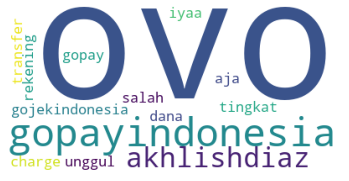

In [83]:
#Wordcloud
wordcloud = WordCloud(collocations = False,background_color='white', stopwords=stopword, max_words=50, max_font_size=200, random_state=1).generate(word)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [84]:
#Menyimpan WordCloud
fig.savefig("wordcloud_tweet.png", dpi=900)

## TF IDF

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
vectorizer = CountVectorizer(min_df=0.02)
x = vectorizer.fit_transform(data_stop)
DTM = pd.DataFrame(x.toarray(), columns = vectorizer.get_feature_names())
DTM['klaimat_tweet']=data_stop
DTM['sum_features'] = DTM.sum(axis=1)
DTM = DTM.loc[DTM['sum_features'] !=0].drop(['sum_features'], axis=1)
DTM.to_csv('DTM_tweet.csv')

In [89]:
DTM

,aja,akhlishdiaz,charge,dana,gojekindonesia,gopay,gopayindonesia,iyaa,ovo,rekening,salah,tingkat,transfer,unggul,klaimat_tweet
0,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1178,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1179,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1180,1,1,1,1,1,1,1,1,2,1,1,1,1,1,gopayindonesia akhlishdiaz gojekindonesia iyaa...


In [90]:
vectorizer = TfidfVectorizer(min_df=0.02)
vec = vectorizer.fit_transform(data_stop)
TFIDF = pd.DataFrame(vec.toarray(), columns = vectorizer.get_feature_names())
TFIDF['klaimat_tweet']=data_stop
TFIDF['sum_features'] = TFIDF.sum(axis=1)
TFIDF = TFIDF.loc[TFIDF['sum_features'] !=0].drop(['sum_features'], axis=1)
TFIDF.to_csv('TFIDF_tweet.csv')

In [91]:
TFIDF

,aja,akhlishdiaz,charge,dana,gojekindonesia,gopay,gopayindonesia,iyaa,ovo,rekening,salah,tingkat,transfer,unggul,klaimat_tweet
0,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
2,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
3,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
4,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1178,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1179,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
1180,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,gopayindonesia akhlishdiaz gojekindonesia iyaa...
